In [0]:
# Problem 3c
# Compute saddle Point Equilibrium for zero sum game using Linear Programming
# Based on Von Neumann Theorem
# Row Player Minimizes by default
import numpy as np
from scipy.optimize import linprog 
def compute_SPE(A, RowPlayerMinimize = True):
  if RowPlayerMinimize == False:
    A = A.T
  m, n = A.shape
  A_ub_m = np.append(-np.eye(m), A.T, axis=0)
  b_ub_m = np.append(np.zeros(shape=(m,1)), np.ones(shape=(n,1)))
  p = linprog(c=-np.ones(shape=(m, 1)), A_ub=A_ub_m, b_ub=b_ub_m).x
  v_p = 1 / np.sum(p)
  p_star = p * v_p

  A_ub_n = np.append(-np.eye(n), -A, axis=0)
  b_ub_n = np.append(np.zeros(shape=(n,1)), -np.ones(shape=(m,1)))
  q = linprog(c=np.ones(shape=(n, 1)), A_ub=A_ub_n, b_ub=b_ub_n).x
  v_q = 1 / np.sum(q)
  q_star = q * v_q
  if RowPlayerMinimize == True:
    return p_star, q_star
  else:
    return q_star, p_star
  
  

In [2]:
# Problem 4 (a) We first compute the p*, q* using LP
m = 10
n = 30
A = np.random.rand(m,n)
p_star, q_star = compute_SPE(A, RowPlayerMinimize=True)
value = np.dot(np.dot(p_star.T, A), q_star)

# Then we run the iteration given in problem 3.
cumulative_payoff = 0
for i in range(10000):
  i_t = np.random.choice(range(m), p=p_star)
  j_t = np.random.choice(range(n), p=q_star)
  cumulative_payoff += A[i_t][j_t]
average_payoff = cumulative_payoff / 10000

print("Value of game:", value)
print("Average payoff", average_payoff)
if abs(value - average_payoff) < 0.01:
  print("Average payoff is approximately equal to the value of zero sum game!")

Value of game: 0.5632248614387622
Average payoff 0.5676736844766388
Average payoff is approximately equal to the value of zero sum game!


In [0]:
# Problem 4 (b)
# Each player acts randomly at t = 1
action_1 = np.random.choice(range(m))
action_2 = np.random.choice(range(n))
freq_1 = np.zeros(shape=(m,1)) # stores the frequency of action of player 1
freq_2 = np.zeros(shape=(n,1)) # stores the frequency of action of player 2
freq_1[action_1] += 1
freq_2[action_2] += 1
i = 1 # start at second time step
num_iter = 100
norms = np.zeros(shape=(2, num_iter))
while(i < num_iter + 1):
  p_hat = freq_1 / i
  q_hat = freq_2 / i
  # compute ||p_hat - p*||, ||q_hat - q*||
  norms[0][i-1] = np.linalg.norm(p_hat - p_star, ord=np.inf)
  norms[1][i-1] = np.linalg.norm(q_hat - q_star, ord=np.inf)
  # do linear programming, compute the best response
  A_ub_1 = -np.eye(m)
  b_ub_1 = np.zeros(shape=(1, m))
  A_eq_1 = np.ones(shape=(1, m))
  b_eq_1 = 1
  p_hat_prev = p_hat 
  p_hat = linprog(c=np.dot(q_hat.T, A.T), A_ub=A_ub_1, b_ub=b_ub_1, A_eq=A_eq_1, b_eq=b_eq_1).x
  A_ub_2 = -np.eye(n)
  b_ub_2 = np.zeros(shape=(1,n))
  A_eq_2 = np.ones(shape=(1,n))
  b_eq_2 = 1
  q_hat = linprog(c=-np.dot(p_hat_prev.T, A), A_ub=A_ub_2, b_ub=b_ub_2, A_eq=A_eq_2, b_eq=b_eq_2).x
  i += 1


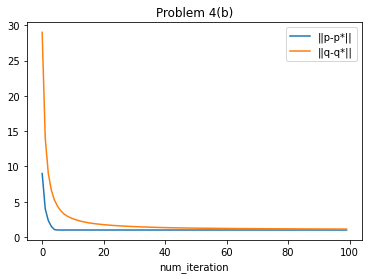

In [4]:
import matplotlib.pyplot as plt
plt.plot(norms[0])
plt.plot(norms[1])
plt.title("Problem 4(b)")
plt.xlabel("num_iteration")
plt.legend(["||p-p*||", "||q-q*||"])
plt.show()